# Scenario: Analyzing Retail Sales Data
## Tasks:
### Load the Data:
- Load the CSV data into a Pandas DataFrame.

### Data Cleaning:
- Check for missing values and handle them appropriately.
- Ensure data types are correct (e.g., TransactionDate should be a datetime type).

### Data Analysis:
- Calculate the total sales amount for each transaction.
- Find the total sales by product category.
- Determine the top 5 products by sales quantity.
- Analyze sales trends over time (e.g., daily or monthly sales trends).
- Identify the top 5 customers by total purchase amount.

### Data Visualization:
- Plot the total sales by product category.
- Create a time series plot for sales trends.
- Visualize the top 5 products by sales quantity using a bar chart.
- Plot the top 5 customers by purchase amount.
- Export Results:

Save the cleaned dataset and analysis results to new CSV files.
Save the visualizations as image files.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data
salse_data = pd.read_csv('salse_data.csv', index_col=0)
salse_data

,ProductName,Category,Quantity,Price,TransactionDate,CustomerID,CustomerName,CustomerLocation
ProductID,,,,,,,,
101,Apple,Produce,10,0.5,01/01/2023,201,John Doe,New York1101
102,Banana,Produce,6,0.3,02/01/2023,202,Jane Smith,California
103,Bread,Bakery,2,2.5,03/01/2023,203,Emily Davis,Texas
104,Milk,Dairy,1,1.5,03/01/2023,204,John Doe,New York
105,Cheese,Dairy,5,3.0,04/01/2023,205,Michael Brown,Florida
106,Chicken,Meat,1,5.0,04/01/2023,206,Jane Smith,California
107,Rice,Grains,3,1.2,05/01/2023,207,David Wilson,Ohio
108,Beans,Grains,4,0.8,05/01/2023,208,James Johnson,Illinois
109,Apple,Produce,5,0.5,06/01/2023,209,Linda Martinez,New Jersey


In [3]:
# Data Cleaning
salse_data['TransactionDate'] = pd.to_datetime(salse_data['TransactionDate'])
salse_data['TransactionDate']

ProductID
101   2023-01-01
102   2023-02-01
103   2023-03-01
104   2023-03-01
105   2023-04-01
106   2023-04-01
107   2023-05-01
108   2023-05-01
109   2023-06-01
110   2023-06-01
Name: TransactionDate, dtype: datetime64[ns]

In [4]:
# Calculate the total sales amount for each transaction.
salse_data['TotalAmount'] = salse_data['Quantity'] * salse_data['Price']
salse_data

,ProductName,Category,Quantity,Price,TransactionDate,CustomerID,CustomerName,CustomerLocation,TotalAmount
ProductID,,,,,,,,,
101,Apple,Produce,10,0.5,2023-01-01,201,John Doe,New York1101,5.0
102,Banana,Produce,6,0.3,2023-02-01,202,Jane Smith,California,1.8
103,Bread,Bakery,2,2.5,2023-03-01,203,Emily Davis,Texas,5.0
104,Milk,Dairy,1,1.5,2023-03-01,204,John Doe,New York,1.5
105,Cheese,Dairy,5,3.0,2023-04-01,205,Michael Brown,Florida,15.0
106,Chicken,Meat,1,5.0,2023-04-01,206,Jane Smith,California,5.0
107,Rice,Grains,3,1.2,2023-05-01,207,David Wilson,Ohio,3.6
108,Beans,Grains,4,0.8,2023-05-01,208,James Johnson,Illinois,3.2
109,Apple,Produce,5,0.5,2023-06-01,209,Linda Martinez,New Jersey,2.5


In [5]:
#Find the total sales by product category.
total_sales = salse_data.groupby('Category')['TotalAmount'].sum().reset_index()
total_sales

,Category,TotalAmount
0,Bakery,5.0
1,Dairy,16.5
2,Grains,6.8
3,Meat,5.0
4,Produce,11.7


In [6]:
# Determine the top 5 products by sales quantity.
top_sales = salse_data.groupby('ProductName')['Quantity'].sum().nlargest(5).reset_index()
top_sales

,ProductName,Quantity
0,Apple,15
1,Banana,14
2,Cheese,5
3,Beans,4
4,Rice,3


In [7]:
#Analyze sales trends over time (e.g., daily or monthly sales trends).
sales_trends = salse_data.groupby(salse_data['TransactionDate'].dt.to_period('D'))['TotalAmount'].sum().reset_index()
sales_trends

,TransactionDate,TotalAmount
0,2023-01-01,5.0
1,2023-02-01,1.8
2,2023-03-01,6.5
3,2023-04-01,20.0
4,2023-05-01,6.8
5,2023-06-01,4.9


In [8]:
# Identify the top 5 customers by total purchase amount.
top_customers = salse_data.groupby('CustomerName')['TotalAmount'].sum().nlargest(5).reset_index()
top_customers

,CustomerName,TotalAmount
0,Michael Brown,15.0
1,Jane Smith,6.8
2,John Doe,6.5
3,Emily Davis,5.0
4,David Wilson,3.6


### Data Visualization
- Plot the total sales by product category.
- Create a time series plot for sales trends.
- Visualize the top 5 products by sales quantity using a bar chart.
- Plot the top 5 customers by purchase amount.

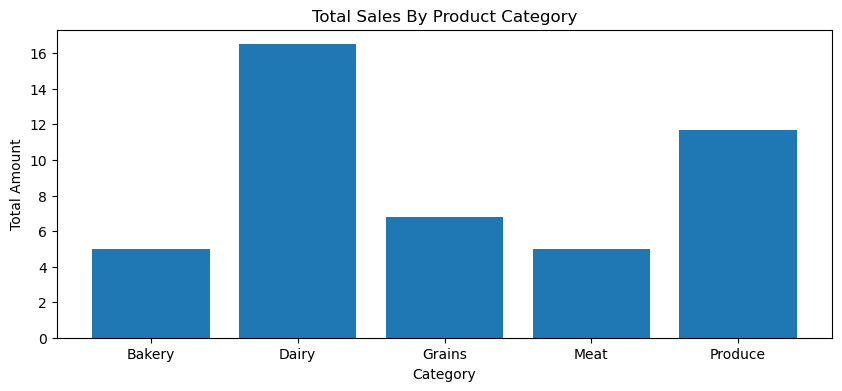

In [9]:
#Plot the total sales by product category.
plt.figure(figsize=(10, 4))
plt.bar(total_sales['Category'], total_sales['TotalAmount'])
plt.title('Total Sales By Product Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.savefig('total_sales.png')
plt.show()

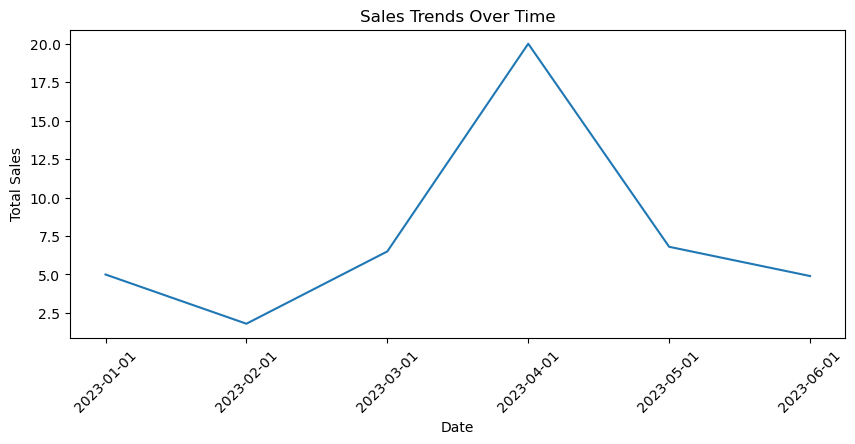

In [10]:
#Create a time series plot for sales trends.
plt.figure(figsize=(10, 4))
plt.plot(sales_trends['TransactionDate'].astype(str), sales_trends['TotalAmount'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('sales_trends.png')
plt.show()

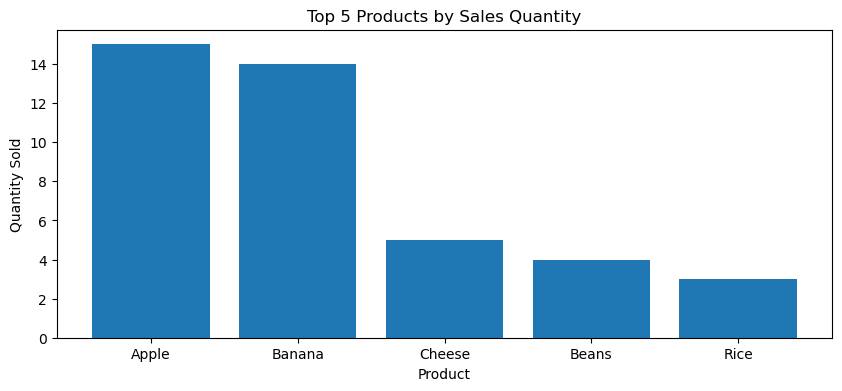

In [11]:
#Visualize the top 5 products by sales quantity using a bar chart.
plt.figure(figsize=(10, 4))
plt.bar(top_sales['ProductName'], top_sales['Quantity'])
plt.title('Top 5 Products by Sales Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.savefig('top_sales.png')
plt.show()

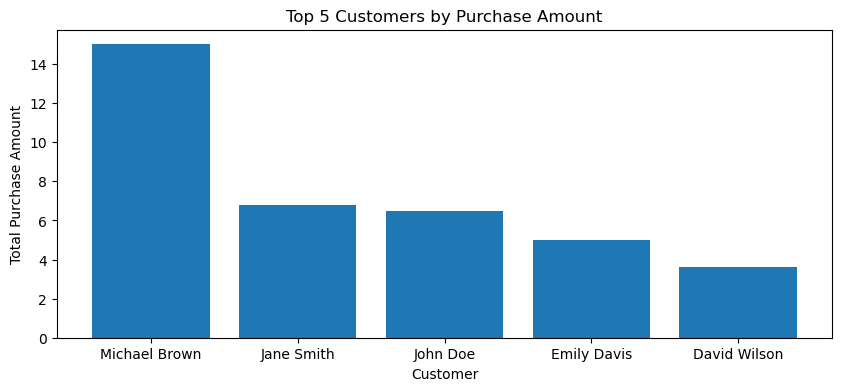

In [12]:
#Plot the top 5 customers by purchase amount.
plt.figure(figsize=(10, 4))
plt.bar(top_customers['CustomerName'], top_customers['TotalAmount'])
plt.title('Top 5 Customers by Purchase Amount')
plt.xlabel('Customer')
plt.ylabel('Total Purchase Amount')
plt.savefig('top_customers.png')
plt.show()

In [13]:
#Export Results: Save the cleaned dataset and analysis results to new CSV files. Save the visualizations as image files.
salse_data.to_csv('cleaned_sales_data.csv', index=False)
total_sales.to_csv('total_sales.csv', index=False) 
top_sales.to_csv('top_sales.csv', index=False)
sales_trends.to_csv('top_trends.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)